In [2]:
import geopandas as gpd
import requests as req
import matplotlib.pyplot as plt

In [ ]:
API_ROUTE = 'https://oaiee.scj.gov.co/agc/rest/services'

# _**LAYER: Delitos de Alto Impacto**_

In [4]:
DAI_layer_0 = f'{API_ROUTE}/Tematicos_Pub/CifrasSCJ/MapServer/0'
DAI_fields_route = f'{DAI_layer_0}/query?where=1=1&outFields=*&f=geojson'
DAI_metadata_route = f'{DAI_layer_0}?f=pjson'
DAI_metadata = req.get(DAI_metadata_route).json()

In [5]:
EPSG = DAI_metadata.get('sourceSpatialReference').get('latestWkid')
DAI = gpd.read_file(DAI_fields_route)
DAI = DAI.to_crs(epsg=EPSG)

# _**LAYER: Cuadrante de Policia**_

In [7]:
CP_layer_25 = f'{API_ROUTE}/Tematicos_NR/EquipamientoPMSDSCJ/MapServer/25'
CP_fields_route = f'{CP_layer_25}/query?where=1=1&outFields=*&f=geojson'
CP_metadata_route = f'{CP_layer_25}?f=pjson'
CP_metadata = req.get(CP_metadata_route).json()

In [8]:
EPSG = CP_metadata.get('sourceSpatialReference').get('latestWkid')
CP = gpd.read_file(CP_fields_route)
CP = gpd.read_file(CP_fields_route)

# _**LAYER: Comando de Atención Inmediata**_

In [10]:
CAI_layer_22 = f'{API_ROUTE}/Tematicos_NR/EquipamientoPMSDSCJ/MapServer/22'
CAI_fields_route = f'{CAI_layer_22}/query?where=1=1&outFields=*&f=geojson'
CAI_metadata_route = f'{CAI_layer_22}?f=pjson'
CAI_metadata = req.get(CAI_metadata_route).json()

In [11]:
CAI = gpd.read_file(CAI_fields_route)

# ***MERGING: Plotting Layers***

# _Cuadrante de Policia + Comando de Atención Inmediata_

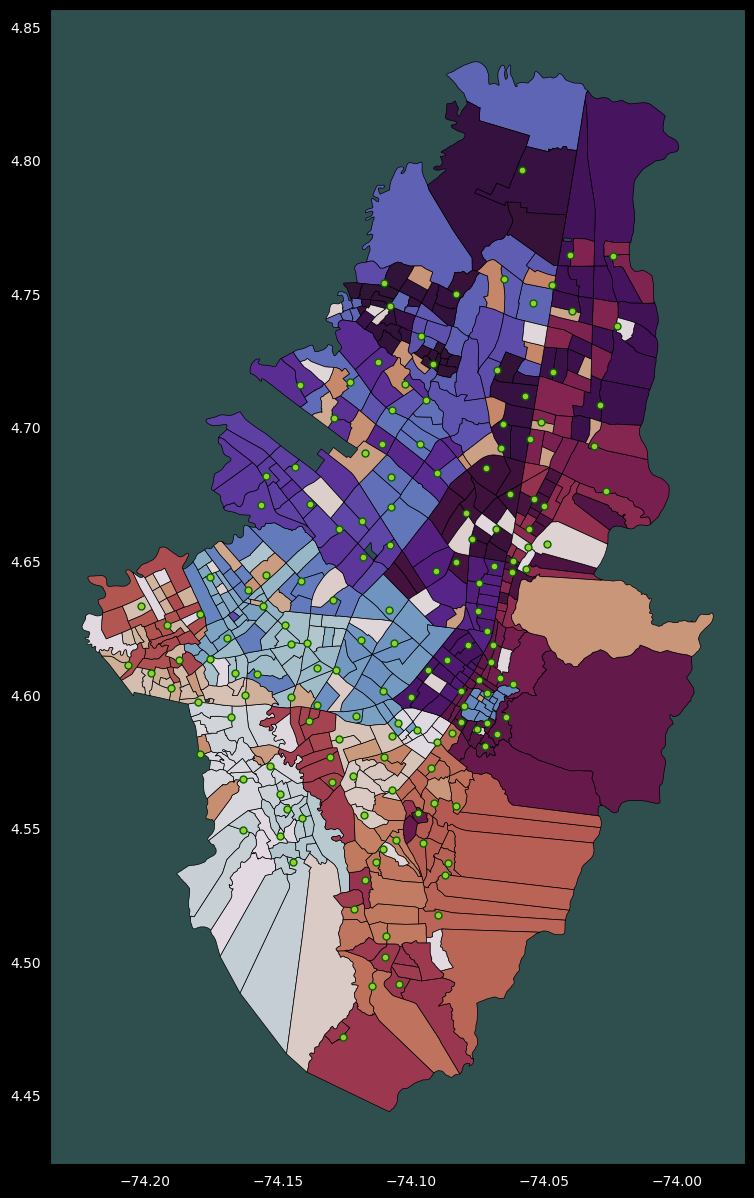

In [98]:
fig, ax = plt.subplots(figsize = (15, 15))
CP.plot(ax = ax, cmap='twilight', edgecolor='black', linewidth=0.5)
CAI.plot(ax = ax, color='yellowgreen', edgecolor='darkgreen', markersize=25)
fig.set_facecolor('black')
ax.set_facecolor(color='darkslategray')
ax.tick_params(labelcolor='snow')

# _Cuadrante de Policia + Delitos de Alto Impacto + Comando de Atención Inmediata_

In [ ]:
fig, ax = plt.subplots(figsize = (35, 35))
CP.plot(ax = ax, cmap='twilight', edgecolor='black', linewidth=0.5)
DAI.plot(ax = ax, color='none', edgecolor='black', linewidth=1.5)
CAI.plot(ax = ax, color='yellowgreen', edgecolor='seagreen', markersize=15)